# Heart Attack Prediction 

In [1]:
import pandas as pd
import webbrowser
import os
import seaborn as sns
import matplotlib.pyplot as plt

#Read heart attack dataset into a data table using pandas
#ha = heart attack
ha_data_table = pd.read_csv("data/heart_attack_prediction_dataset.csv")


## Data Exploration and Processing

In [2]:
#Creating a web page view of the first 100 rows of the data table for easy viewing
html = ha_data_table[0:100].to_html()

filename = "hadata.html"

# Save the HTML representation of the data table to a file for viewing
# 'filename' specifies the file to save to, and 'html' contains the data in HTML format
with open(filename, "w") as f:
    f.write(html)
    
#open the web page in our web browser
full_filename = os.path.abspath(filename)
webbrowser.open("file://{}".format(full_filename))


True

In [3]:
ha_data_table.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
#check for missing values
ha_data_table.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

### Exploring and Processing Numeric Fields

In [5]:
#summary of numeric fields in the data table
ha_data_table.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [6]:
#heart attack risk distribution
print(ha_data_table.groupby('Heart Attack Risk').size())

Heart Attack Risk
0    5624
1    3139
dtype: int64


#### Since the columns Physical Activity Days Per Week and Exercise Hours Per Week essentially convey the frequency of physical activity, keeping only one of them helps streamline and simplify the dataset without losing significant information.

In [7]:
#Removing "Physical Activity Days Per Week" column since it is similar to "Exercise Hours Per Week"
del ha_data_table["Physical Activity Days Per Week"]

#Check if columns had been removed
ha_data_table.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,9,6.615001,261404,31.251233,286,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,1,4.963459,285768,27.194973,235,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9,9.463426,235282,28.176571,587,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,9,7.648981,125640,36.464704,378,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,6,1.514821,160555,21.809144,231,5,Thailand,Asia,Northern Hemisphere,0


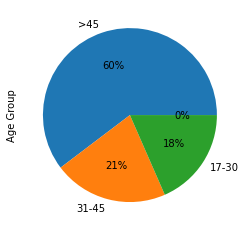

In [8]:
#Exploring the Age Distribution with Pie Chart

# Defining the age bins and labels for age groups
age_bins = [0, 17, 31, 46, 91]
age_labels = ['0-16', '17-30', '31-45', '>45']

# Creating a new column 'Age Group' based on the age bins
ha_data_table['Age Group'] = pd.cut(ha_data_table['Age'], bins=age_bins, labels=age_labels, right=False)

# Ploting the pie chart using the 'Age Group' column instead of 'Age' Column for better Visualization
ha_data_table['Age Group'].value_counts().plot(kind='pie', autopct='%1.0f%%', labeldistance= 1.1)

#Removing 'Age Group' Column after plotting
del ha_data_table['Age Group']

<function matplotlib.pyplot.show(close=None, block=None)>

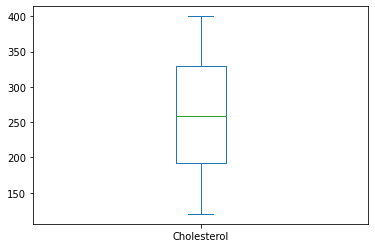

In [9]:
#Exploring Cholesterol Column
ha_data_table['Cholesterol'].plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

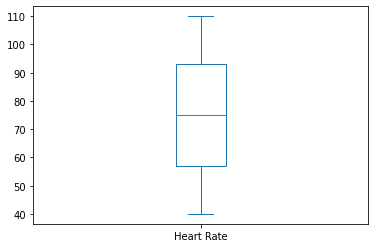

In [10]:
#Exploring Heart Rate Column
ha_data_table['Heart Rate'].plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show

(array([3047.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5716.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

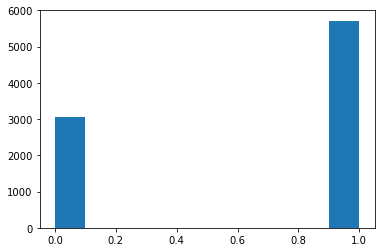

In [11]:
#Exploring the number of diabetics
plt.hist(ha_data_table['Diabetes'])

(array([4443.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4320.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

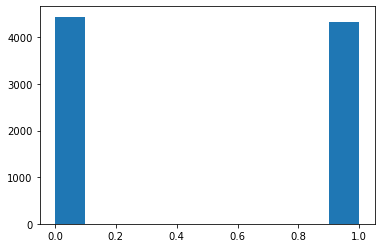

In [12]:
#Exploring the number of people with Family History 
plt.hist(ha_data_table['Family History'])

(array([ 904.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7859.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

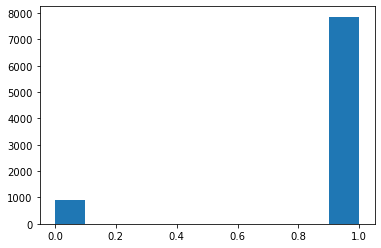

In [13]:
#Exploring the number of smokers
plt.hist(ha_data_table['Smoking'])

(array([4369.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4394.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

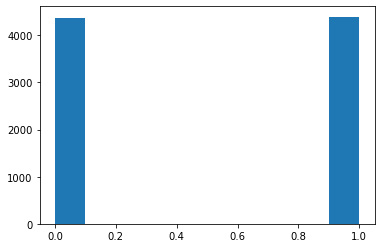

In [14]:
#Exploring the number of obese people
plt.hist(ha_data_table['Obesity'])

(array([3522.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5241.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

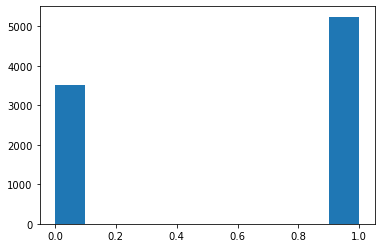

In [15]:
#Exploring the number of people who drink alcohol
plt.hist(ha_data_table['Alcohol Consumption'])

<function matplotlib.pyplot.show(close=None, block=None)>

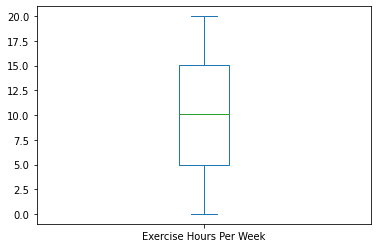

In [16]:
#Exploring Exercise hours per week
ha_data_table['Exercise Hours Per Week'].plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show

(array([4418.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4345.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

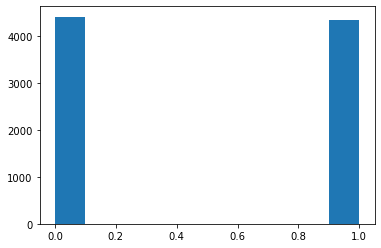

In [17]:
#Exploring the number of people with previous heart problems
plt.hist(ha_data_table['Previous Heart Problems'])

(array([4396.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4367.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

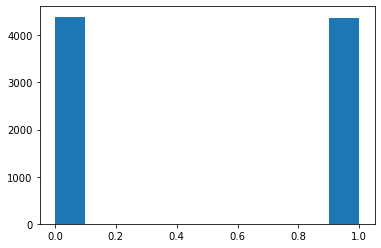

In [18]:
#Exploring Medication Use
plt.hist(ha_data_table['Medication Use'])

<AxesSubplot:ylabel='Stress Level'>

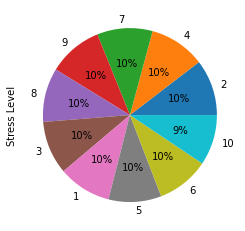

In [19]:
#Exploring the distribution of stress levels
ha_data_table['Stress Level'].value_counts().plot(kind='pie', autopct='%1.0f%%', labeldistance= 1.1)

<function matplotlib.pyplot.show(close=None, block=None)>

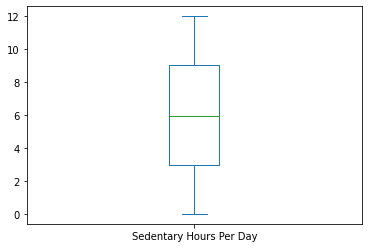

In [20]:
#Exploring Sedentary Hours per Day
ha_data_table['Sedentary Hours Per Day'].plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

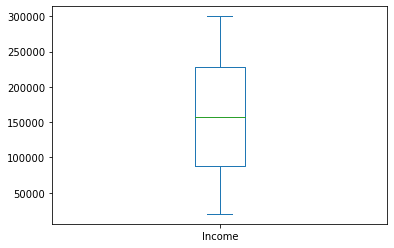

In [21]:
#Exploring Income
ha_data_table['Income'].plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show

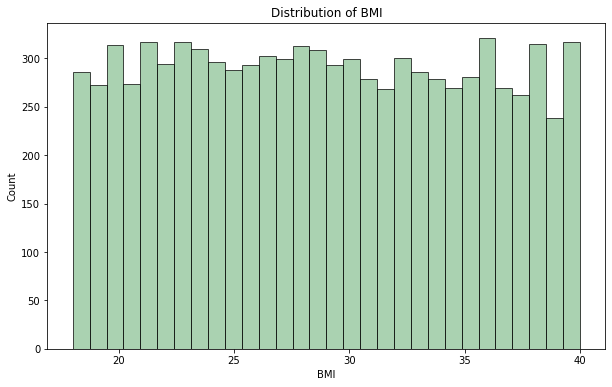

In [22]:
#Exploring BMI
plt.figure(figsize=(10, 6))
plt.hist(ha_data_table['BMI'], bins=30, color='#86bf91', edgecolor='black', alpha=0.7)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

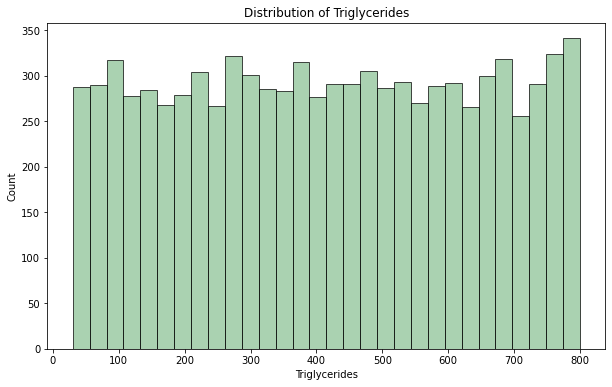

In [23]:
#Exploring Triglycerides
plt.figure(figsize=(10, 6))
plt.hist(ha_data_table['Triglycerides'], bins=30, color='#86bf91', edgecolor='black', alpha=0.7)
plt.title('Distribution of Triglycerides')
plt.xlabel('Triglycerides')
plt.ylabel('Count')
plt.show()

<AxesSubplot:ylabel='Sleep Hours Per Day'>

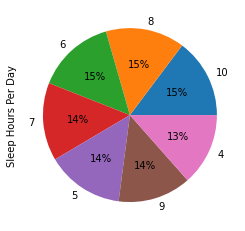

In [24]:
#Exploring the the distribution of sleep hours per day
ha_data_table['Sleep Hours Per Day'].value_counts().plot(kind='pie', autopct='%1.0f%%', labeldistance= 1.1)

### Exploring and Processing Nominal or Categorical Fields

In [25]:
#Summary of categorical fields
ha_data_table.describe(include = 'object')

,Patient ID,Sex,Blood Pressure,Diet,Country,Continent,Hemisphere
count,8763,8763,8763,8763,8763,8763,8763
unique,8763,2,3915,3,20,6,2
top,BMW7812,Male,146/94,Healthy,Germany,Asia,Northern Hemisphere
freq,1,6111,8,2960,477,2543,5660


In [26]:
#Removing "Patient ID" Column, does not affect prediction of heart attack risk
del ha_data_table['Patient ID']

#Check if column is deleted
ha_data_table.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,9,6.615001,261404,31.251233,286,6,Argentina,South America,Southern Hemisphere,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,1,4.963459,285768,27.194973,235,7,Canada,North America,Northern Hemisphere,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,9,9.463426,235282,28.176571,587,4,France,Europe,Northern Hemisphere,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,9,7.648981,125640,36.464704,378,4,Canada,North America,Northern Hemisphere,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,6,1.514821,160555,21.809144,231,5,Thailand,Asia,Northern Hemisphere,0


In [27]:
#Changing "Sex" Column to Numeric for Model to understand
# Mapping 'Female' to 0 and 'Male' to 1 
ha_data_table['Sex'] = ha_data_table['Sex'].map({'Female': 0, 'Male': 1})

#Gender distribution
print(ha_data_table.groupby('Sex').size())

Sex
0    2652
1    6111
dtype: int64


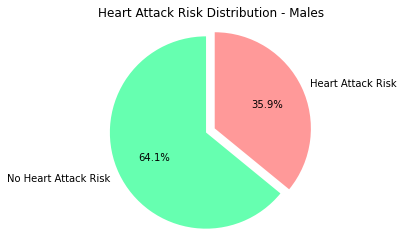

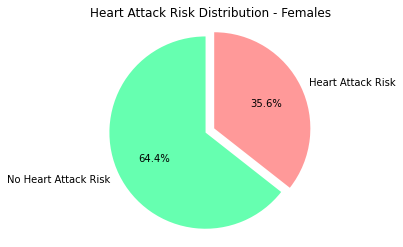

In [28]:
#Exploring heart attack risks for the different genders

# Filter the dataset for males and females
male_data = ha_data_table[ha_data_table['Sex'] == 1]
female_data = ha_data_table[ha_data_table['Sex'] == 0]

# Function to plot the pie chart
def plot_pie_chart(data, title):
    
    labels = ['No Heart Attack Risk', 'Heart Attack Risk']
    
    # Calculate the percentage distribution of heart attack risk categories in the given data
    sizes = data['Heart Attack Risk'].value_counts(normalize=True) * 100
    # Green for No Risk, Red for Risk
    colors = ['#66ffb0', '#ff9999']
    # Leaving a space between the 2 categorys in target variable "Heart Attack Risk" for better visualization
    explode = (0.1, 0)  

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=90)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

# Plot pie charts for males and females
plot_pie_chart(male_data, 'Heart Attack Risk Distribution - Males')
plot_pie_chart(female_data, 'Heart Attack Risk Distribution - Females')

In [29]:
# Splitting 'Blood Pressure' into 'Systolic' and 'Diastolic' columns using panda library str.split() method
ha_data_table[['Systolic', 'Diastolic']] = ha_data_table['Blood Pressure'].str.split('/', expand=True).astype(int)

#Removing 'Blood Pressure' Column
del ha_data_table['Blood Pressure']

#Check
ha_data_table.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Income,BMI,Triglycerides,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,67,1,208,72,0,0,1,0,0,4.168189,...,261404,31.251233,286,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,...,285768,27.194973,235,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,0,324,72,1,0,0,0,0,2.078353,...,235282,28.176571,587,4,France,Europe,Northern Hemisphere,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,...,125640,36.464704,378,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,...,160555,21.809144,231,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [30]:
#using value_counts() to check the different amount of countries respectively
ha_data_table['Country'].value_counts()

Germany           477
Argentina         471
Brazil            462
United Kingdom    457
Australia         449
Nigeria           448
France            446
Canada            440
China             436
New Zealand       435
Japan             433
Italy             431
Spain             430
Colombia          429
Thailand          428
South Africa      425
Vietnam           425
United States     420
India             412
South Korea       409
Name: Country, dtype: int64

In [31]:
#using value_counts() to check the different amount of Continents respectively
ha_data_table['Continent'].value_counts()

Asia             2543
Europe           2241
South America    1362
Australia         884
Africa            873
North America     860
Name: Continent, dtype: int64

In [32]:
#using value_counts() to check the different amount of Hemisphere respectively
ha_data_table['Hemisphere'].value_counts()

Northern Hemisphere    5660
Southern Hemisphere    3103
Name: Hemisphere, dtype: int64

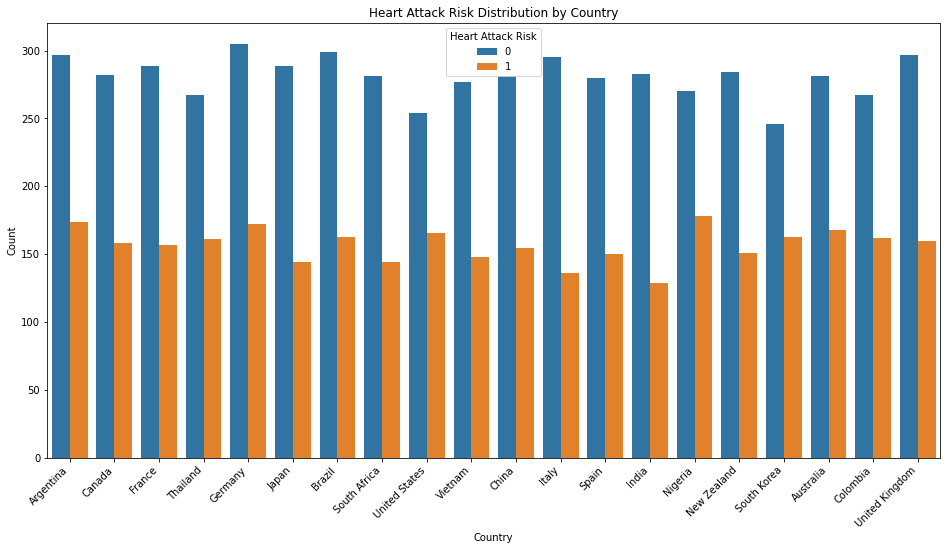

In [33]:
# Bar plot for Country
plt.figure(figsize=(16, 8))

# Creating a count plot to visualize the distribution of 'Heart Attack Risk' within each 'Country'
# The x-axis represents different countries, and the colors represent different heart attack risk categories
# Each bar shows the count of individuals in each combination of country and heart attack risk category
sns.countplot(x='Country', hue='Heart Attack Risk', data=ha_data_table)

plt.title('Heart Attack Risk Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

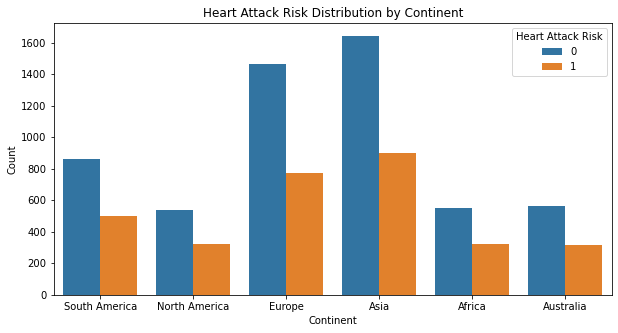

In [34]:
# Bar plot for Continent
plt.figure(figsize=(10, 5))

# Creating a count plot to visualize the distribution of 'Heart Attack Risk' within each 'Hemisphere'
# The x-axis represents different continents, and the colors represent different heart attack risk categories
# Each bar shows the count of individuals in each combination of continents and heart attack risk category
sns.countplot(x='Continent', hue='Heart Attack Risk', data=ha_data_table)

plt.title('Heart Attack Risk Distribution by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.show()

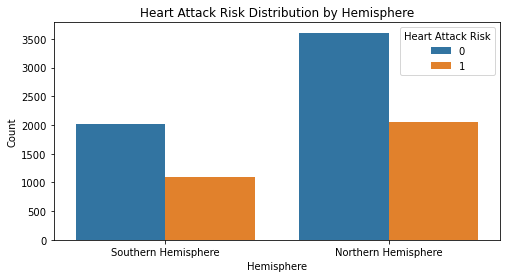

In [35]:
# Bar plot for Hemisphere
plt.figure(figsize=(8, 4))

# Creating a count plot to visualize the distribution of 'Heart Attack Risk' within each 'Hemisphere'
# The x-axis represents different hemisphere, and the colors represent different heart attack risk categories
# Each bar shows the count of individuals in each combination of hemisphere and heart attack risk category
sns.countplot(x='Hemisphere', hue='Heart Attack Risk', data=ha_data_table)

plt.title('Heart Attack Risk Distribution by Hemisphere')
plt.xlabel('Hemisphere')
plt.ylabel('Count')
plt.show()

#### By looking at the 3 bar plots above, the decision was made to exclude the 'Country', 'Continent' and 'Hemisphere' columns from the dataset. The rationale behind this choice comes from the observation that these geographical features have a limited coverage, with the dataset not encompassing all possible countries or continents. When I looked at the numbers, I noticed that for most countries, continents and Hemisphere, the number of people with a heart attack risk was just a bit more than half of those without this risk. This pattern was pretty much the same everywhere. The uniformity of this trend across various geographical regions led to the decision to remove these columns to enhance model simplicity, promote generalization, and mitigate challenges associated with out-of-distribution scenarios.

In [36]:
#Removing 'Country', 'Continent' and 'Hemisphere' Columns

del ha_data_table['Country']
del ha_data_table['Continent']
del ha_data_table['Hemisphere']
                  
#Check
ha_data_table.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic
0,67,1,208,72,0,0,1,0,0,4.168189,...,0,9,6.615001,261404,31.251233,286,6,0,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,...,0,1,4.963459,285768,27.194973,235,7,0,165,93
2,21,0,324,72,1,0,0,0,0,2.078353,...,1,9,9.463426,235282,28.176571,587,4,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,...,0,9,7.648981,125640,36.464704,378,4,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,...,0,6,1.514821,160555,21.809144,231,5,0,91,88


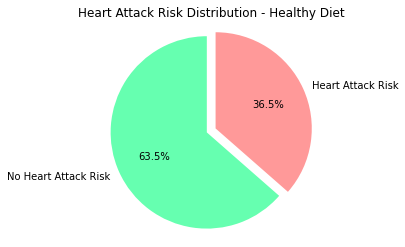

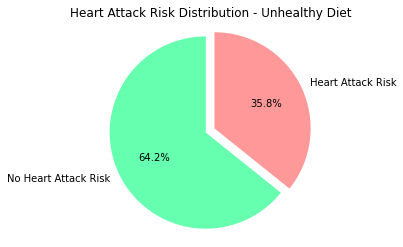

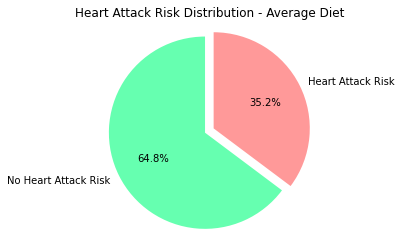

In [37]:
#Exploring Heart Attack Risk for the different Diets


# Filter the dataset for the diets
healthy_data = ha_data_table[ha_data_table['Diet'] == "Healthy"]
unhealthy_data = ha_data_table[ha_data_table['Diet'] == "Unhealthy"]
average_data = ha_data_table[ha_data_table['Diet'] == "Average"]

# Function to plot the pie chart
def plot_pie_chart(data, title):
    
    labels = ['No Heart Attack Risk', 'Heart Attack Risk']
    
    # Calculate the percentage distribution of heart attack risk categories in the given data
    sizes = data['Heart Attack Risk'].value_counts(normalize=True) * 100
    # Green for No Risk, Red for Risk
    colors = ['#66ffb0', '#ff9999']
    # Leaving a space between the 2 categorys in target variable "Heart Attack Risk" for better visualization
    explode = (0.1, 0)  

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=90)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

# Plot pie charts for males and females
plot_pie_chart(healthy_data, 'Heart Attack Risk Distribution - Healthy Diet')
plot_pie_chart(unhealthy_data, 'Heart Attack Risk Distribution - Unhealthy Diet')
plot_pie_chart(average_data, 'Heart Attack Risk Distribution - Average Diet')



In [38]:
#Applying one-hot encoding on categorical column "Diet"
ha_data_table = pd.get_dummies(ha_data_table, columns = ["Diet"])

ha_data_table.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Income,BMI,Triglycerides,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic,Diet_Average,Diet_Healthy,Diet_Unhealthy
0,67,1,208,72,0,0,1,0,0,4.168189,...,261404,31.251233,286,6,0,158,88,1,0,0
1,21,1,389,98,1,1,1,1,1,1.813242,...,285768,27.194973,235,7,0,165,93,0,0,1
2,21,0,324,72,1,0,0,0,0,2.078353,...,235282,28.176571,587,4,0,174,99,0,1,0
3,84,1,383,73,1,1,1,0,1,9.828130,...,125640,36.464704,378,4,0,163,100,1,0,0
4,66,1,318,93,1,1,1,1,0,5.804299,...,160555,21.809144,231,5,0,91,88,0,0,1


In [39]:
#Check if all columns or fields are now Numeric and not Nominal or Categorical
ha_data_table.describe()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Income,BMI,Triglycerides,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic,Diet_Average,Diet_Healthy,Diet_Unhealthy
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,0.697364,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,...,158263.181901,28.891446,417.677051,7.023508,0.358211,135.075659,85.156111,0.332306,0.337784,0.329910
std,21.249509,0.459425,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,...,80575.190806,6.319181,223.748137,1.988473,0.479502,26.349976,14.676565,0.471067,0.472981,0.470207
min,18.000000,0.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,...,20062.000000,18.002337,30.000000,4.000000,0.000000,90.000000,60.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,...,88310.000000,23.422985,225.500000,5.000000,0.000000,112.000000,72.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,...,157866.000000,28.768999,417.000000,7.000000,0.000000,135.000000,85.000000,0.000000,0.000000,0.000000
75%,72.000000,1.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,...,227749.000000,34.324594,612.000000,9.000000,1.000000,158.000000,98.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,...,299954.000000,39.997211,800.000000,10.000000,1.000000,180.000000,110.000000,1.000000,1.000000,1.000000


## Exporting the Cleaned Dataset to a new CSV File for Model Training

In [40]:
ha_data_table.to_csv('data/heart_attack_prediction_cleaned_dataset.csv', index=False)